In [1]:
train = pd.read_csv('../dataset/train.csv')

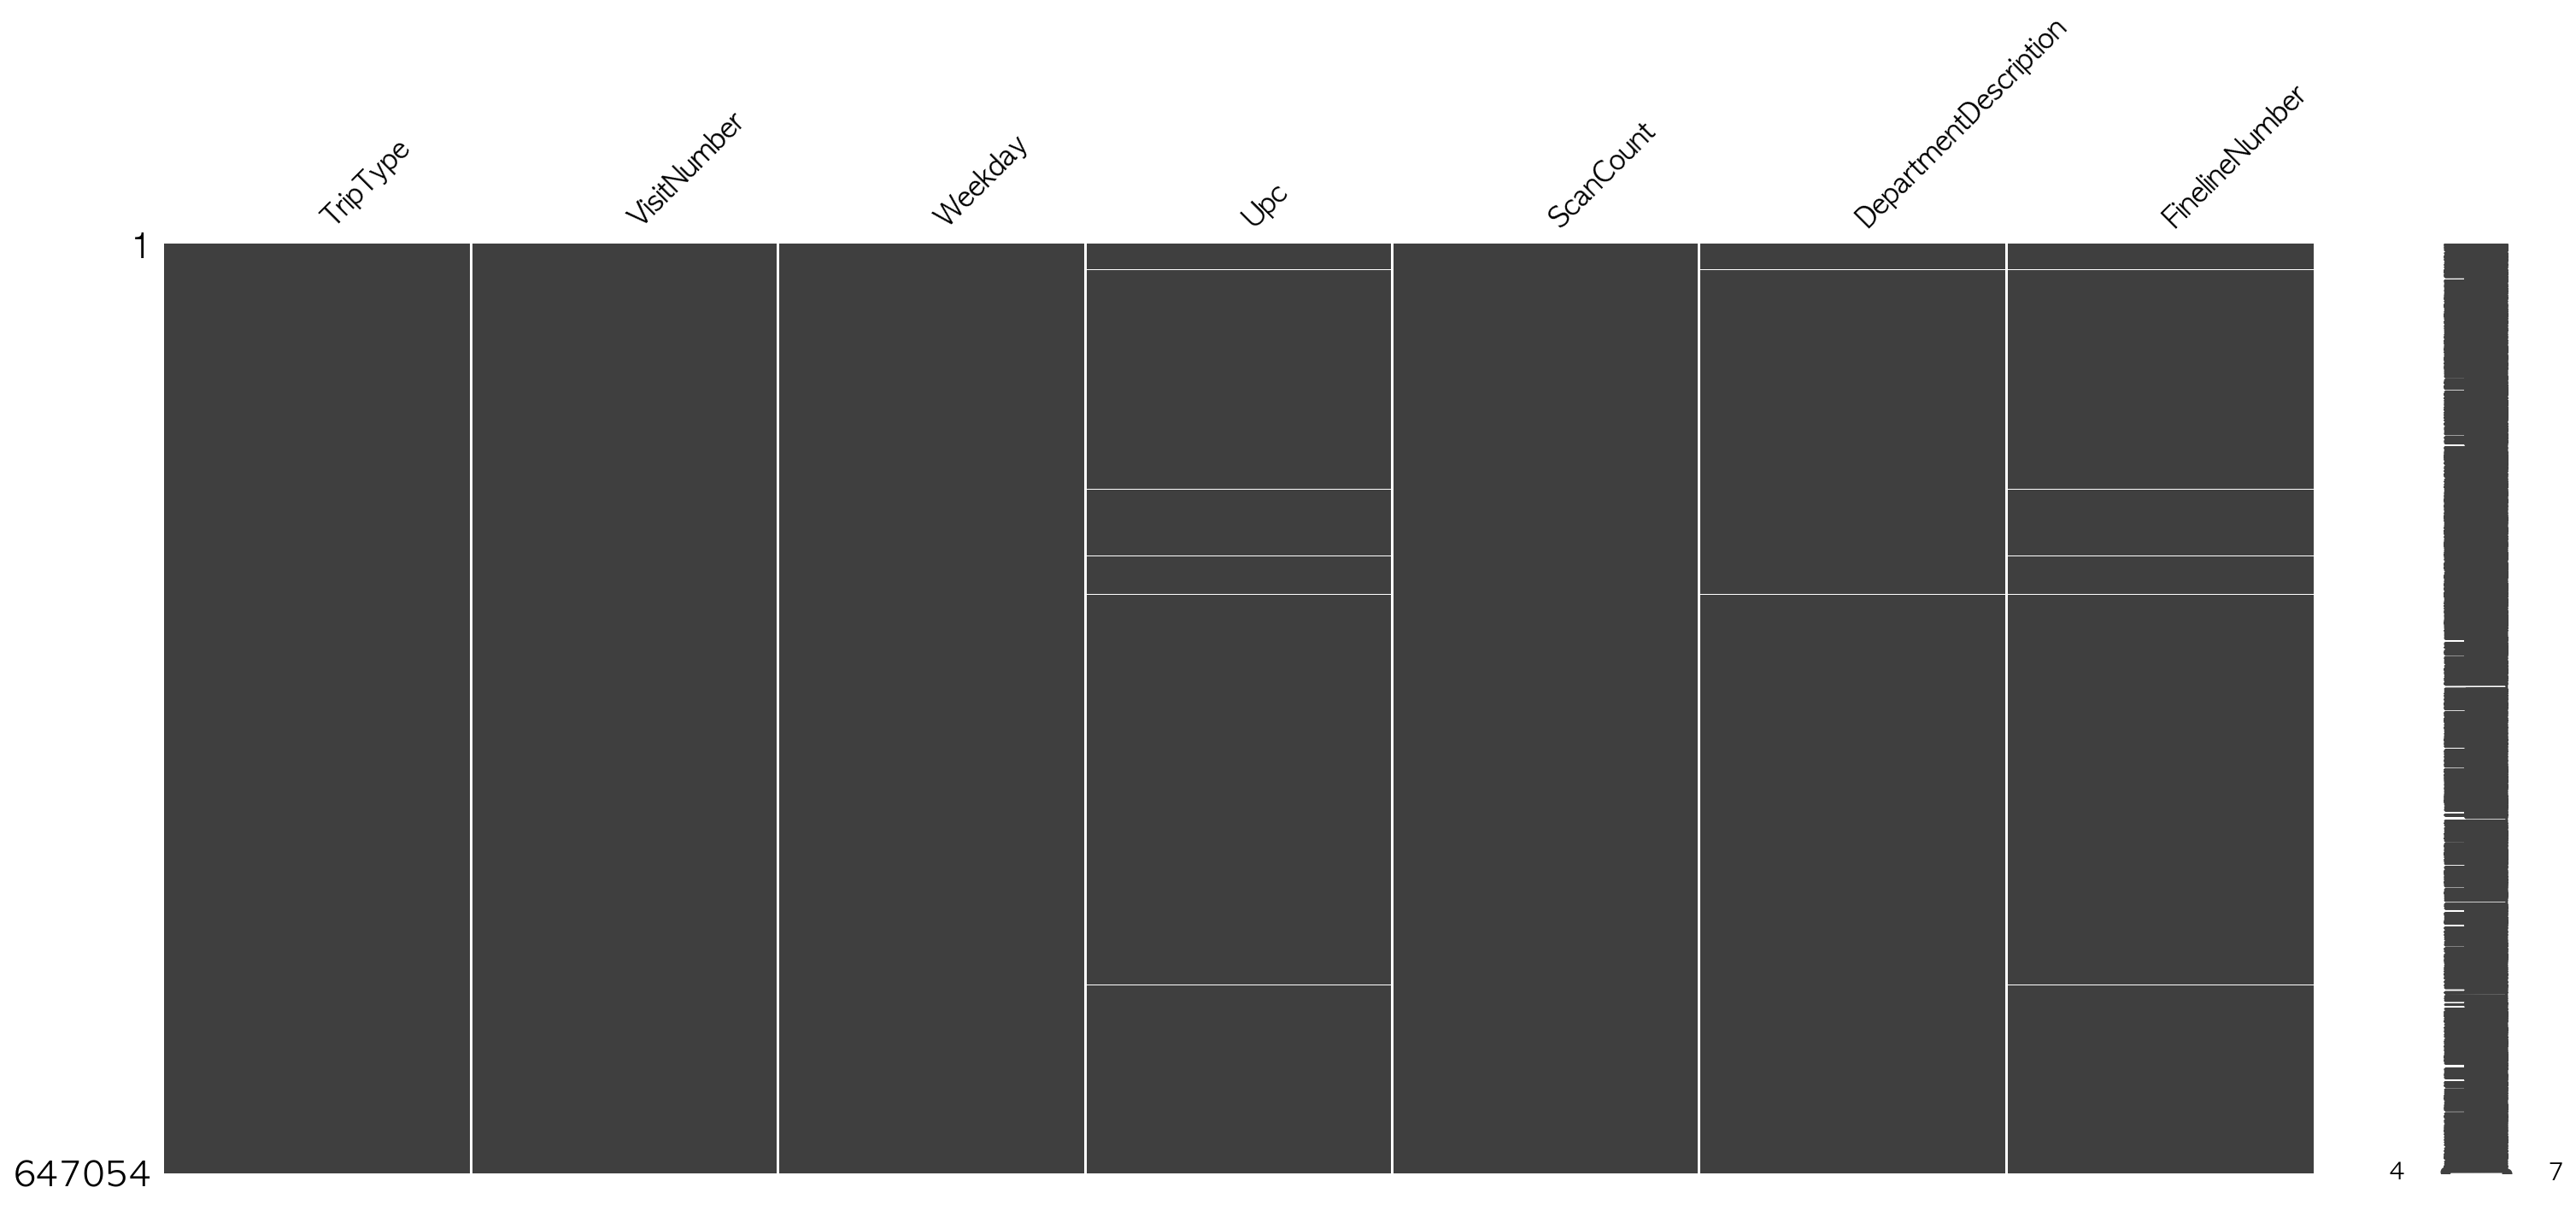

In [2]:
import missingno as msno
msno.matrix(train)

In [3]:
train.tail()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,Sunday,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,Sunday,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,Sunday,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0
647053,8,191347,Sunday,3.800060e+09,1,GROCERY DRY GOODS,3600.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 647054 non-null int64
VisitNumber              647054 non-null int64
Weekday                  647054 non-null object
Upc                      642925 non-null float64
ScanCount                647054 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB


In [5]:
print("Missing Values in Upc:", train[train["Upc"].isnull()].shape[0])
train[train["Upc"].isnull()].head()

Missing Values in Upc: 4129


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
25,26,8,Friday,NaN,1,NaN,NaN
548,27,259,Friday,NaN,3,NaN,NaN
549,27,259,Friday,NaN,1,NaN,NaN
959,999,409,Friday,NaN,-1,NaN,NaN
1116,39,479,Friday,NaN,1,NaN,NaN


In [6]:
print("Missing Values in FinelineNumber:", train[train["FinelineNumber"].isnull()].shape[0])
train[train["FinelineNumber"].isnull()].head()

Missing Values in FinelineNumber: 4129


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
25,26,8,Friday,NaN,1,NaN,NaN
548,27,259,Friday,NaN,3,NaN,NaN
549,27,259,Friday,NaN,1,NaN,NaN
959,999,409,Friday,NaN,-1,NaN,NaN
1116,39,479,Friday,NaN,1,NaN,NaN


In [7]:
idx_upc = np.where(train["Upc"].isnull())[0]
idx_flnum = np.where(train["FinelineNumber"].isnull())[0]
print("idx_upc=idx_flnum:", np.any(idx_upc==idx_flnum))

idx_upc=idx_flnum: True


- Upc와 FinelineNumber의 Missing Value Index는 같음

In [8]:
print("Missing Values in DepartmentDescription:", train[train["DepartmentDescription"].isnull()].shape[0])
train[train["DepartmentDescription"].isnull()].head()

Missing Values in DepartmentDescription: 1361


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
25,26,8,Friday,NaN,1,NaN,NaN
548,27,259,Friday,NaN,3,NaN,NaN
549,27,259,Friday,NaN,1,NaN,NaN
959,999,409,Friday,NaN,-1,NaN,NaN
1116,39,479,Friday,NaN,1,NaN,NaN


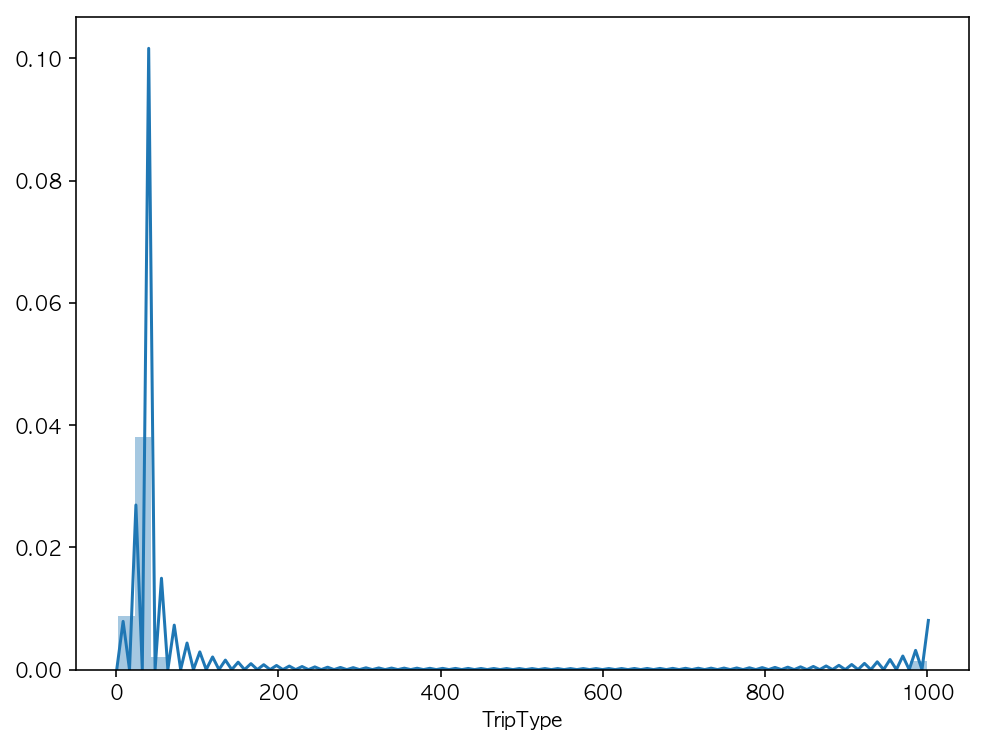

In [9]:
plt.figure(figsize=(8, 6))
sns.distplot(train.TripType)
plt.show()

In [10]:
wd = {
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3, 
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6,
}
train["Weekday"] = train["Weekday"].apply(lambda x: wd[x])
train["Weekday"] = train["Weekday"].astype("category")

In [11]:
train.tail()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,6,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,6,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,6,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,6,4.190008e+09,1,DAIRY,1512.0
647053,8,191347,6,3.800060e+09,1,GROCERY DRY GOODS,3600.0


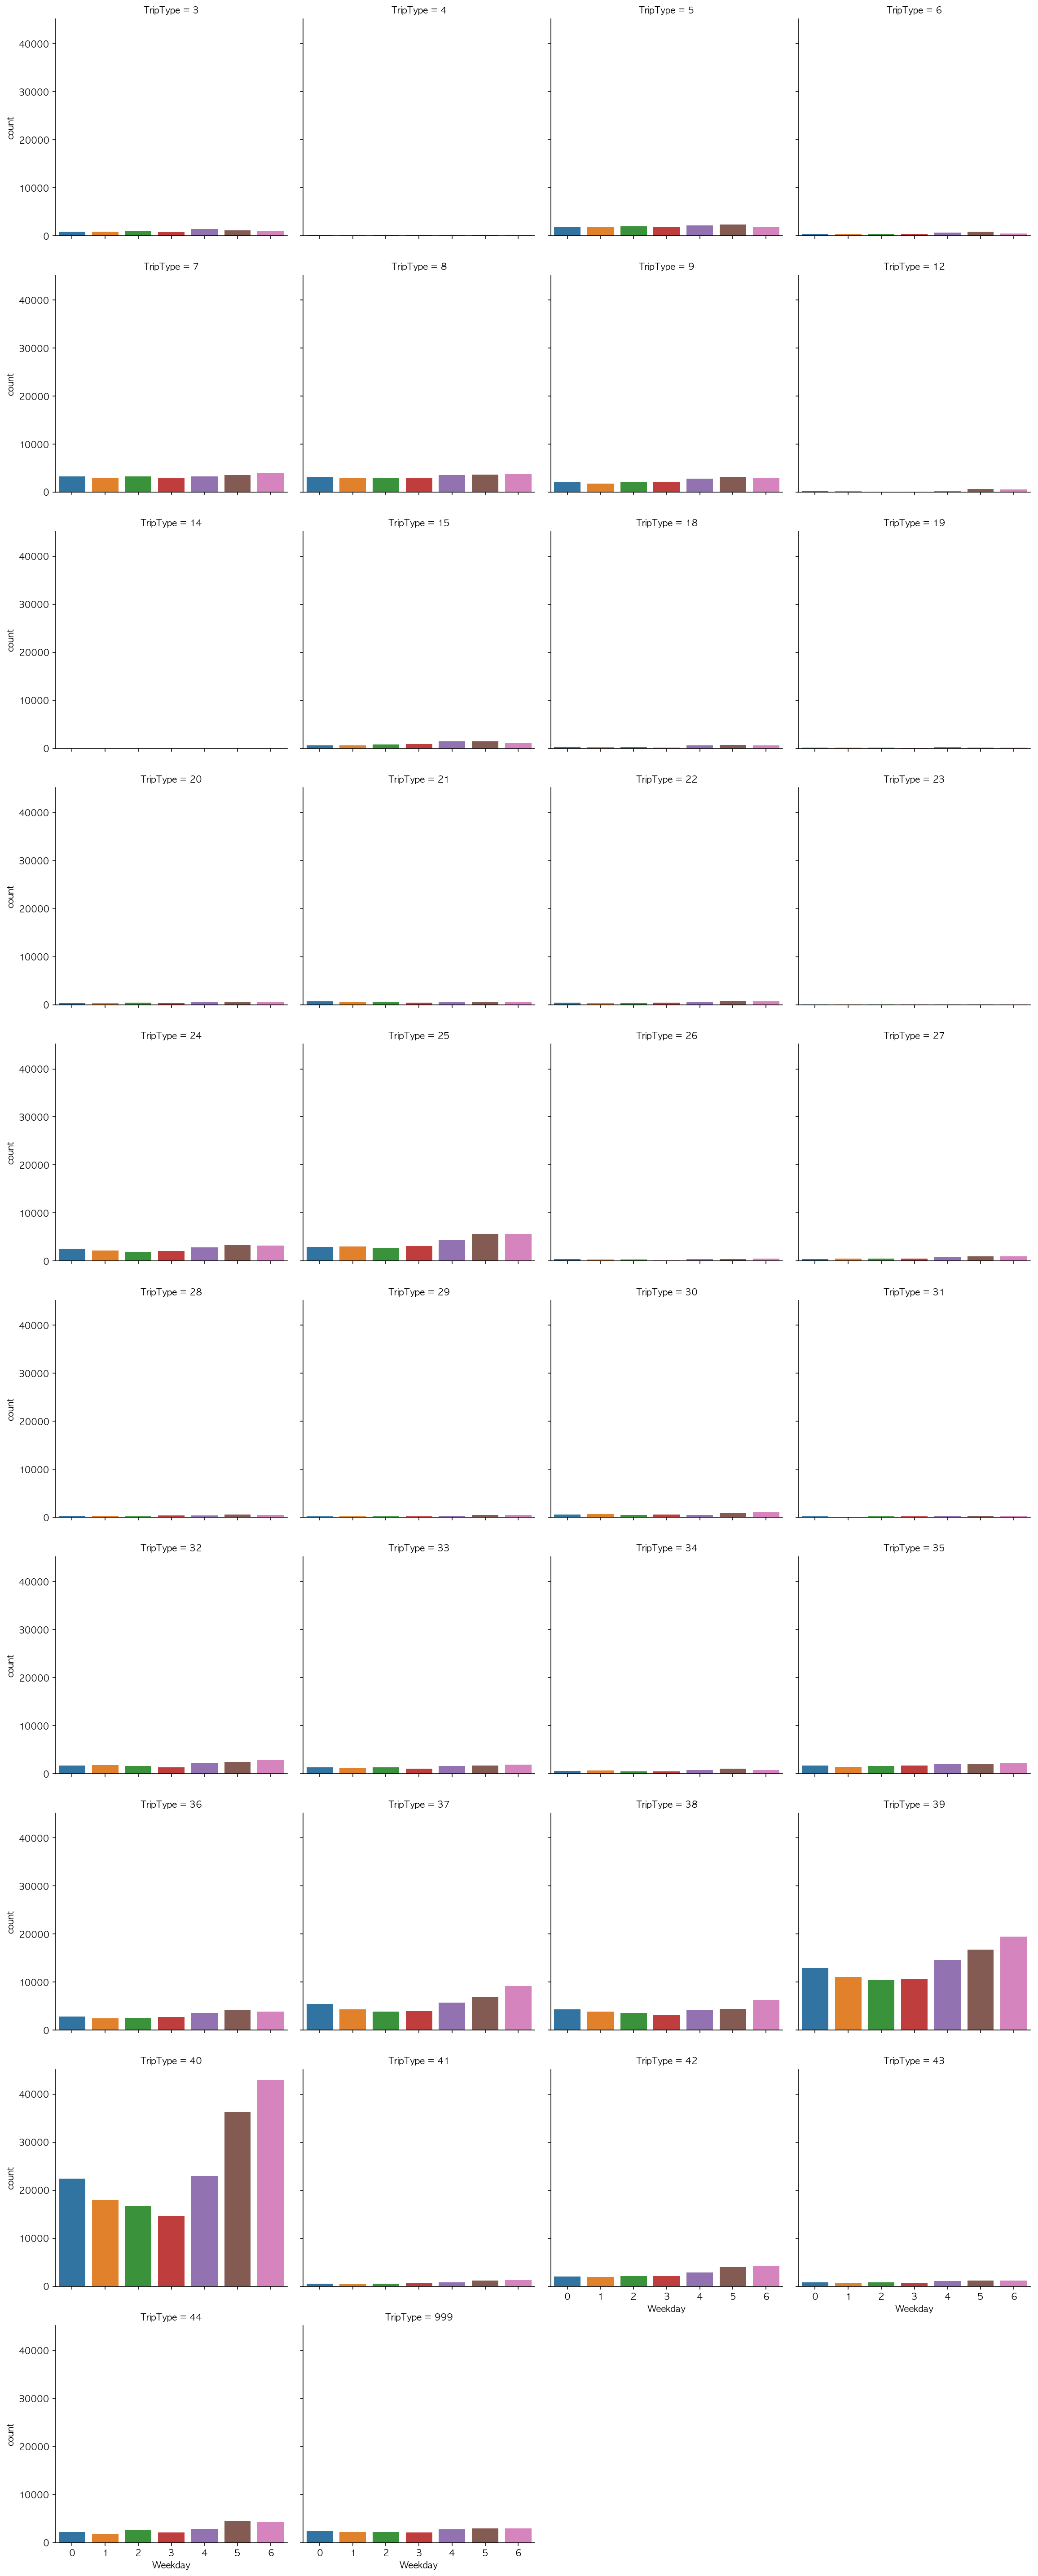

In [12]:
sns.factorplot(x="Weekday", col="TripType", col_wrap=4, data=train[train.notnull()], kind="count")
plt.show()

In [13]:
train["DepartmentDescription"].unique()

array(['FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE',
       'PAINT AND ACCESSORIES', 'DSD GROCERY', 'MEAT - FRESH & FROZEN',
       'DAIRY', 'PETS AND SUPPLIES', 'HOUSEHOLD CHEMICALS/SUPP', nan,
       'IMPULSE MERCHANDISE', 'PRODUCE', 'CANDY, TOBACCO, COOKIES',
       'GROCERY DRY GOODS', 'BOYS WEAR', 'FABRICS AND CRAFTS',
       'JEWELRY AND SUNGLASSES', 'MENS WEAR', 'ACCESSORIES',
       'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI',
       'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY',
       'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES',
       'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING',
       'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS',
       'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY',
       'ELECTRONICS', 'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',

In [14]:
train["DepartmentDescription"].value_counts()[:15]

GROCERY DRY GOODS              70402
DSD GROCERY                    68332
PRODUCE                        51115
DAIRY                          43820
PERSONAL CARE                  41969
IMPULSE MERCHANDISE            28712
HOUSEHOLD CHEMICALS/SUPP       24880
PHARMACY OTC                   23306
FROZEN FOODS                   21101
HOUSEHOLD PAPER GOODS          16274
COMM BREAD                     15244
BEAUTY                         14865
MENS WEAR                      12250
FINANCIAL SERVICES             10723
INFANT CONSUMABLE HARDLINES    10646
Name: DepartmentDescription, dtype: int64

In [15]:
departments_train = pd.crosstab(train.index, [train.DepartmentDescription])
departments_train.tail()

DepartmentDescription,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
row_0,,,,,,,,,,,,,,,,,,,,,
647049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
trainDept_df = train.join(departments_train)

In [17]:
trainDept_df = trainDept_df.drop(["VisitNumber", "Weekday", "Upc", "ScanCount",
                                  "DepartmentDescription", "FinelineNumber"], axis=1)

In [18]:
trainDept_df.head()

,TripType,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
sns.factorplot(x="TripType", col="DepartmentDescription", col_wrap=3, 
               data=train[train.notnull()], kind="count", size=7, orient="h")
plt.show()

In [20]:
train.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

In [21]:
train["Upc"].unique().shape

(97715,)

In [22]:
train["FinelineNumber"].unique().shape

(5196,)

In [23]:
# sns.factorplot(x="ScanCount", col="TripType", col_wrap=4, 
#                data=train[train[train.notnull()]["ScanCount"]<0], kind="count")
# plt.show()

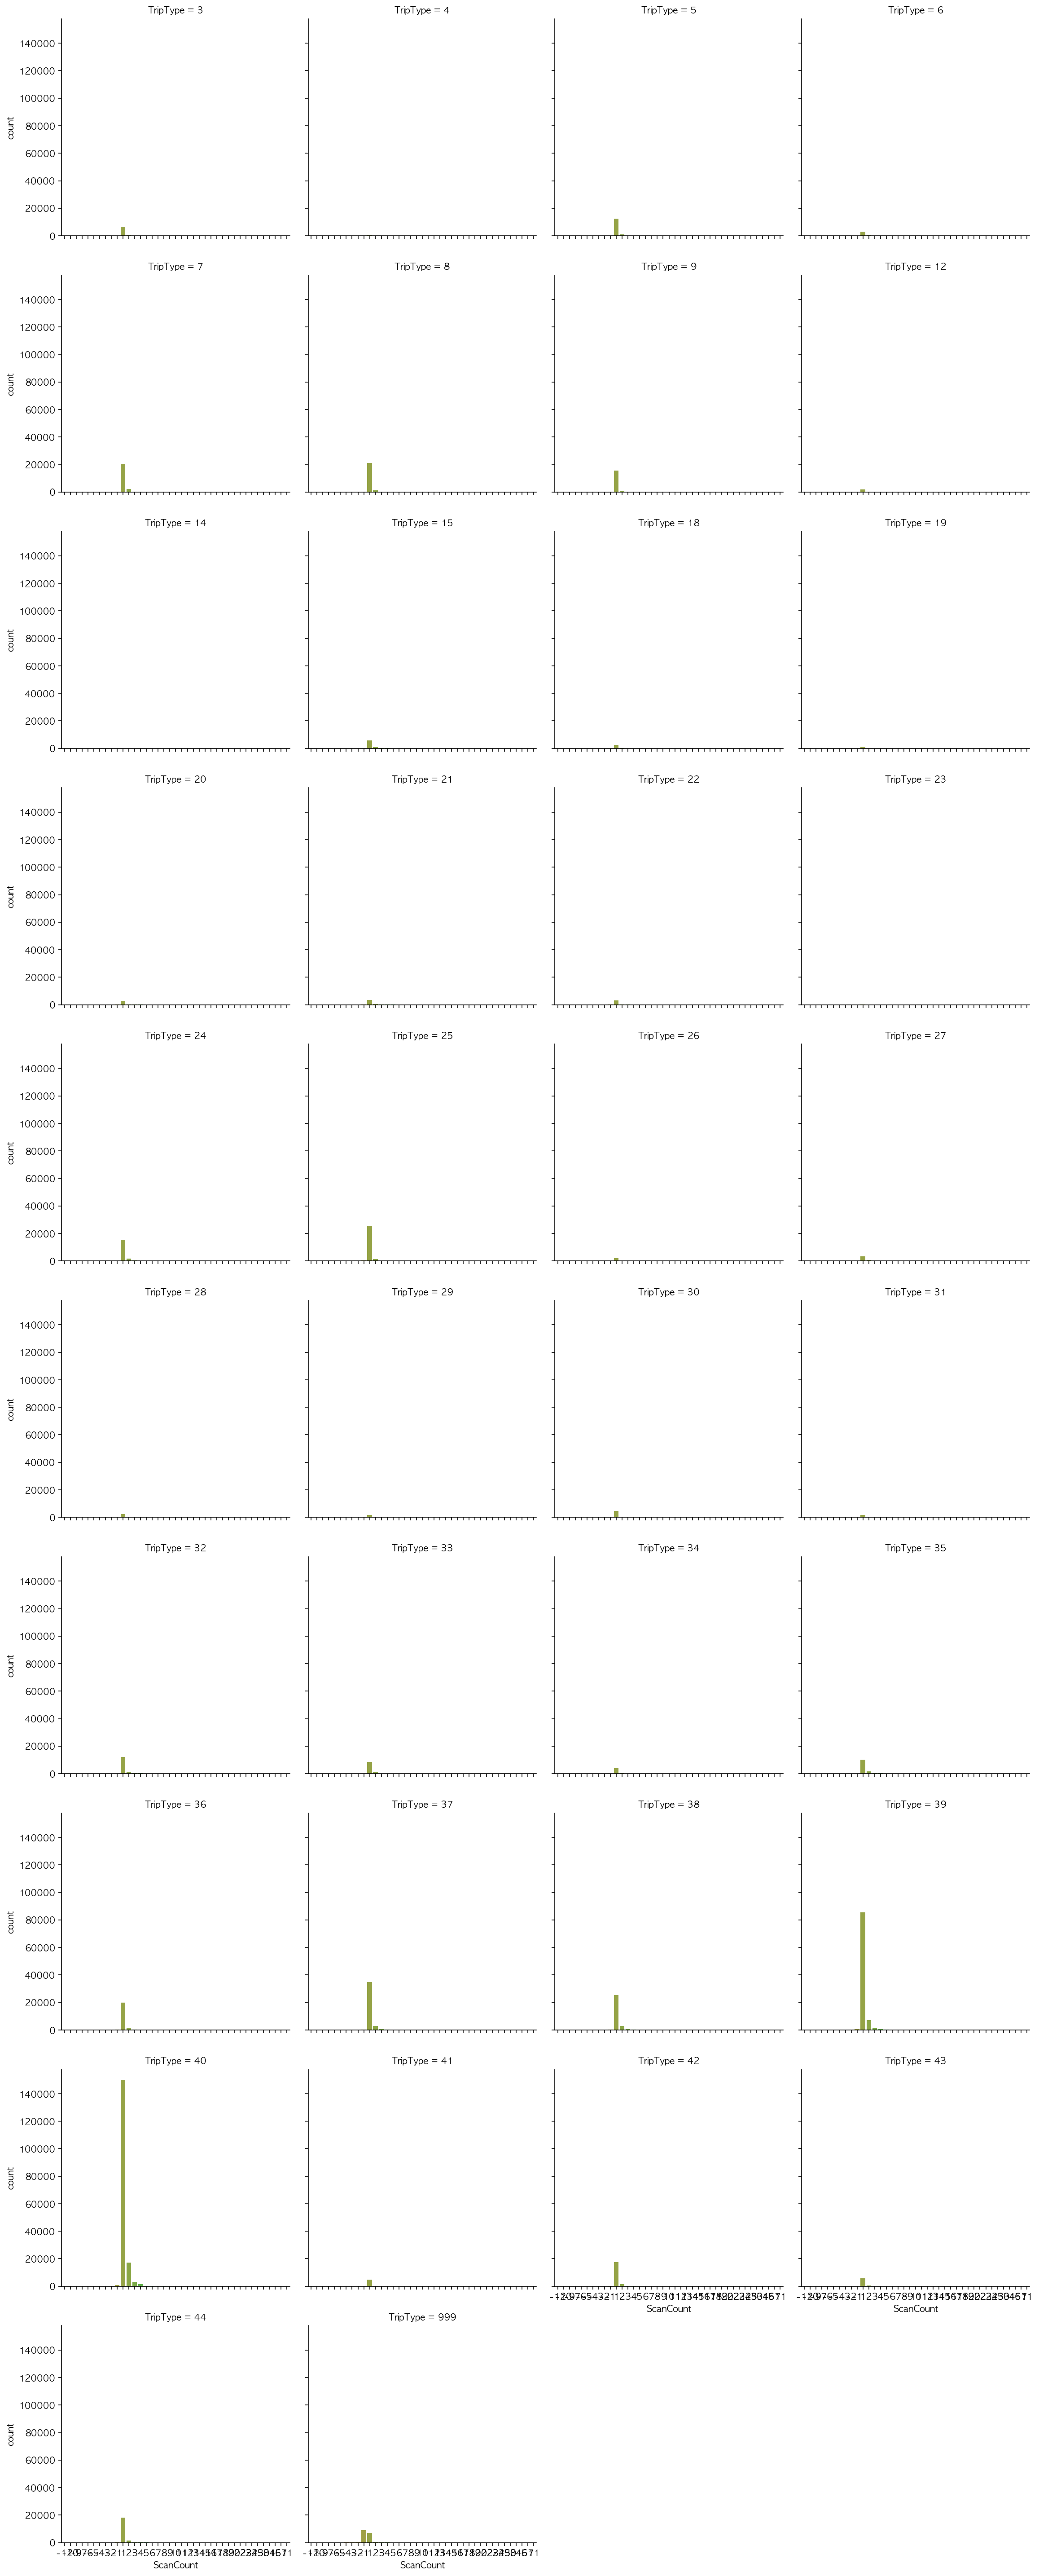

In [24]:
sns.factorplot(x="ScanCount", col="TripType", col_wrap=4, 
               data=train[train.notnull()], kind="count")
plt.show()

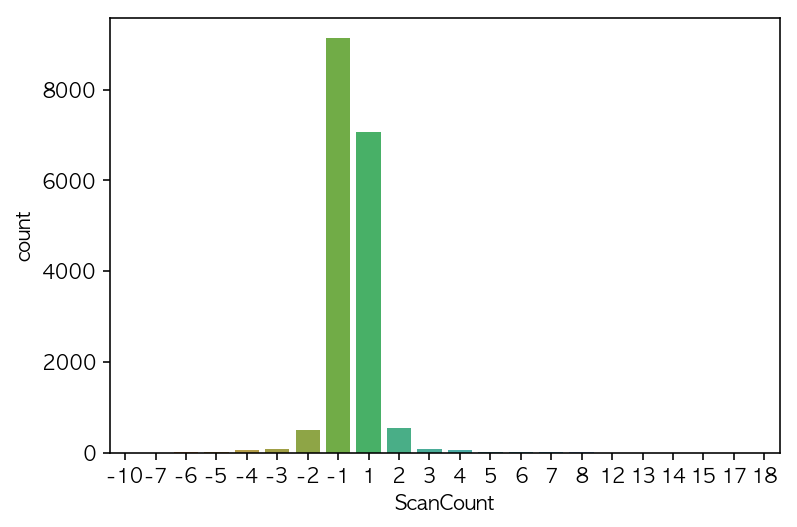

In [25]:
sns.countplot(x="ScanCount", data=train[train["TripType"]==999])

- 1개 반품은 클래스999이 거의 상당부분 차지함
- 클래스999에서는 1개 반품이 1개 구매보다 많이 나타남

In [26]:
def count_digits(x):
    x = str(x)
    if x == "nan":
        return 0
    return len(x.split(".")[0])

In [27]:
from collections import Counter
count_upc_digits = train["Upc"].apply(count_digits)
Counter(count_upc_digits)

Counter({0: 4129,
         3: 7,
         4: 29745,
         5: 372,
         7: 1,
         8: 412,
         9: 2166,
         10: 433341,
         11: 168418,
         12: 8463})

- grouping
- recognizing returns

In [28]:
len(str(6.811315e+10).split('.')[0])

11

In [29]:
train[train["Upc"] <1000]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
429744,40,127954,3,834.0,1,BAKERY,5016.0
429745,40,127954,3,834.0,2,BAKERY,5016.0
448895,39,134005,4,834.0,1,BAKERY,5016.0
629674,39,187105,6,834.0,-1,BAKERY,5016.0
629675,39,187105,6,834.0,1,BAKERY,5016.0
629676,39,187105,6,834.0,1,BAKERY,5016.0
629677,39,187105,6,834.0,1,BAKERY,5016.0


In [30]:
train[train["VisitNumber"]==187105]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
629671,39,187105,6,7.874201e+09,1,DAIRY,7960.0
629672,39,187105,6,7.670528e+10,1,PETS AND SUPPLIES,1146.0
629673,39,187105,6,7.670528e+10,1,PETS AND SUPPLIES,1146.0
629674,39,187105,6,8.340000e+02,-1,BAKERY,5016.0
629675,39,187105,6,8.340000e+02,1,BAKERY,5016.0
629676,39,187105,6,8.340000e+02,1,BAKERY,5016.0
629677,39,187105,6,8.340000e+02,1,BAKERY,5016.0
629678,39,187105,6,3.660081e+09,1,PHARMACY OTC,1181.0
629679,39,187105,6,8.410581e+10,1,PERSONAL CARE,1402.0
629680,39,187105,6,8.715630e+10,1,PETS AND SUPPLIES,1146.0


In [31]:
train[train["VisitNumber"]==127954]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
429740,40,127954,3,6.500660e+10,1,PHARMACY OTC,4086.0
429741,40,127954,3,2.551310e+10,2,PRE PACKED DELI,7550.0
429742,40,127954,3,7.365084e+09,1,FABRICS AND CRAFTS,8029.0
429743,40,127954,3,7.365084e+09,1,FABRICS AND CRAFTS,8029.0
429744,40,127954,3,8.340000e+02,1,BAKERY,5016.0
429745,40,127954,3,8.340000e+02,2,BAKERY,5016.0
429746,40,127954,3,2.033140e+10,1,MEAT - FRESH & FROZEN,6082.0
429747,40,127954,3,2.057740e+10,1,SERVICE DELI,8015.0
429748,40,127954,3,7.835557e+09,1,DAIRY,1431.0
429749,40,127954,3,2.015420e+10,1,SERVICE DELI,8001.0


- PHARMACY RX는 거의 missing value

In [32]:
import requests

In [33]:
key = "2k9mdu498k9kevcu59qrtp25"
upc = "035000521019"

In [34]:
import urllib

req = urllib.request.Request("http://api.walmartlabs.com/v1/items?apiKey={}&upc={}".format(key, upc))
res = urllib.request.urlopen(req)

In [35]:
import json
json_rt = res.read().decode("utf-8")
py_rt = json.loads(json_rt)

In [36]:
py_rt["items"][0]["categoryPath"]

'Personal Care/Oral Care/Toothpaste'

In [37]:
def check_digit(x):
    try:
        odd = map(int, ','.join(x[-1::-2]).split(','))
        even = map(int, ','.join(x[-2::-2]).split(','))
        sum_odd3 = sum(odd) * 3
        total = sum_odd3 + sum(even)
        rem = total % 10
        if rem == 0:
            return rem
        return 10 - rem
    except:
        return -9999

In [38]:
def full_upc(x):
    try:
        if len(x) < 12:
            missing = 11 - len(x)
            zeros = ["0"] * missing
            xx = zeros + ','.join(x).split(',') + [str(check_digit(x))]
            xx = ''.join(xx)
            return xx
    except:
        return -9999

In [39]:
def float_to_str(obj):
    while obj != "nan":
        obj = str(obj).split(".")[0]
        return obj

In [40]:
train["Upc"] = train["Upc"].apply(lambda x: float_to_str(x))

In [41]:
train["check"] = train.Upc.apply(check_digit)

In [42]:
train.tail()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,check
647049,39,191346,6,32390001778,1,PHARMACY OTC,1118.0,8
647050,39,191346,6,7874205336,1,FROZEN FOODS,1752.0,3
647051,39,191346,6,4072,1,PRODUCE,4170.0,3
647052,8,191347,6,4190007664,1,DAIRY,1512.0,1
647053,8,191347,6,3800059655,1,GROCERY DRY GOODS,3600.0,1


In [43]:
train["full_upc"] = train.Upc.apply(full_upc)

In [44]:
train.tail()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,check,full_upc
647049,39,191346,6,32390001778,1,PHARMACY OTC,1118.0,8,323900017788
647050,39,191346,6,7874205336,1,FROZEN FOODS,1752.0,3,078742053363
647051,39,191346,6,4072,1,PRODUCE,4170.0,3,000000040723
647052,8,191347,6,4190007664,1,DAIRY,1512.0,1,041900076641
647053,8,191347,6,3800059655,1,GROCERY DRY GOODS,3600.0,1,038000596551


In [45]:
upcs = train["full_upc"][:20:2]

In [47]:
cats = []
for upc in upcs:
    req = urllib.request.Request("http://api.walmartlabs.com/v1/items?apiKey={}&upc={}".format(key, upc))
    res = urllib.request.urlopen(req)
    json_res = res.read().decode("utf-8")
    py_res = json.loads(json_res)
    cats.append(py_res["items"][0]["categoryPath"])

In [48]:
def company(x):
    try:
        p = x[:6]
        if p == "000000":
            return x[-5]
        return p
    except:
        return -9999

In [49]:
train["company"] = train.Upc.apply(company) 

In [50]:
train["FinelineNumber"] = train.FinelineNumber.apply(float_to_str)

In [51]:
train.tail()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,check,full_upc,company
647049,39,191346,6,32390001778,1,PHARMACY OTC,1118,8,323900017788,323900
647050,39,191346,6,7874205336,1,FROZEN FOODS,1752,3,078742053363,787420
647051,39,191346,6,4072,1,PRODUCE,4170,3,000000040723,4072
647052,8,191347,6,4190007664,1,DAIRY,1512,1,041900076641,419000
647053,8,191347,6,3800059655,1,GROCERY DRY GOODS,3600,1,038000596551,380005


In [53]:
p = train.loc[:, ["VisitNumber", "ScanCount"]]
p.groupby("VisitNumber").sum()

,ScanCount
VisitNumber,
5,-1
7,2
8,28
9,3
10,3
11,4
12,7
15,9
17,4


In [134]:
trip_desc = pd.crosstab(train["TripType"], 
                        train["DepartmentDescription"], 
                        values=train["ScanCount"], 
                        aggfunc="count", 
                        normalize="index")

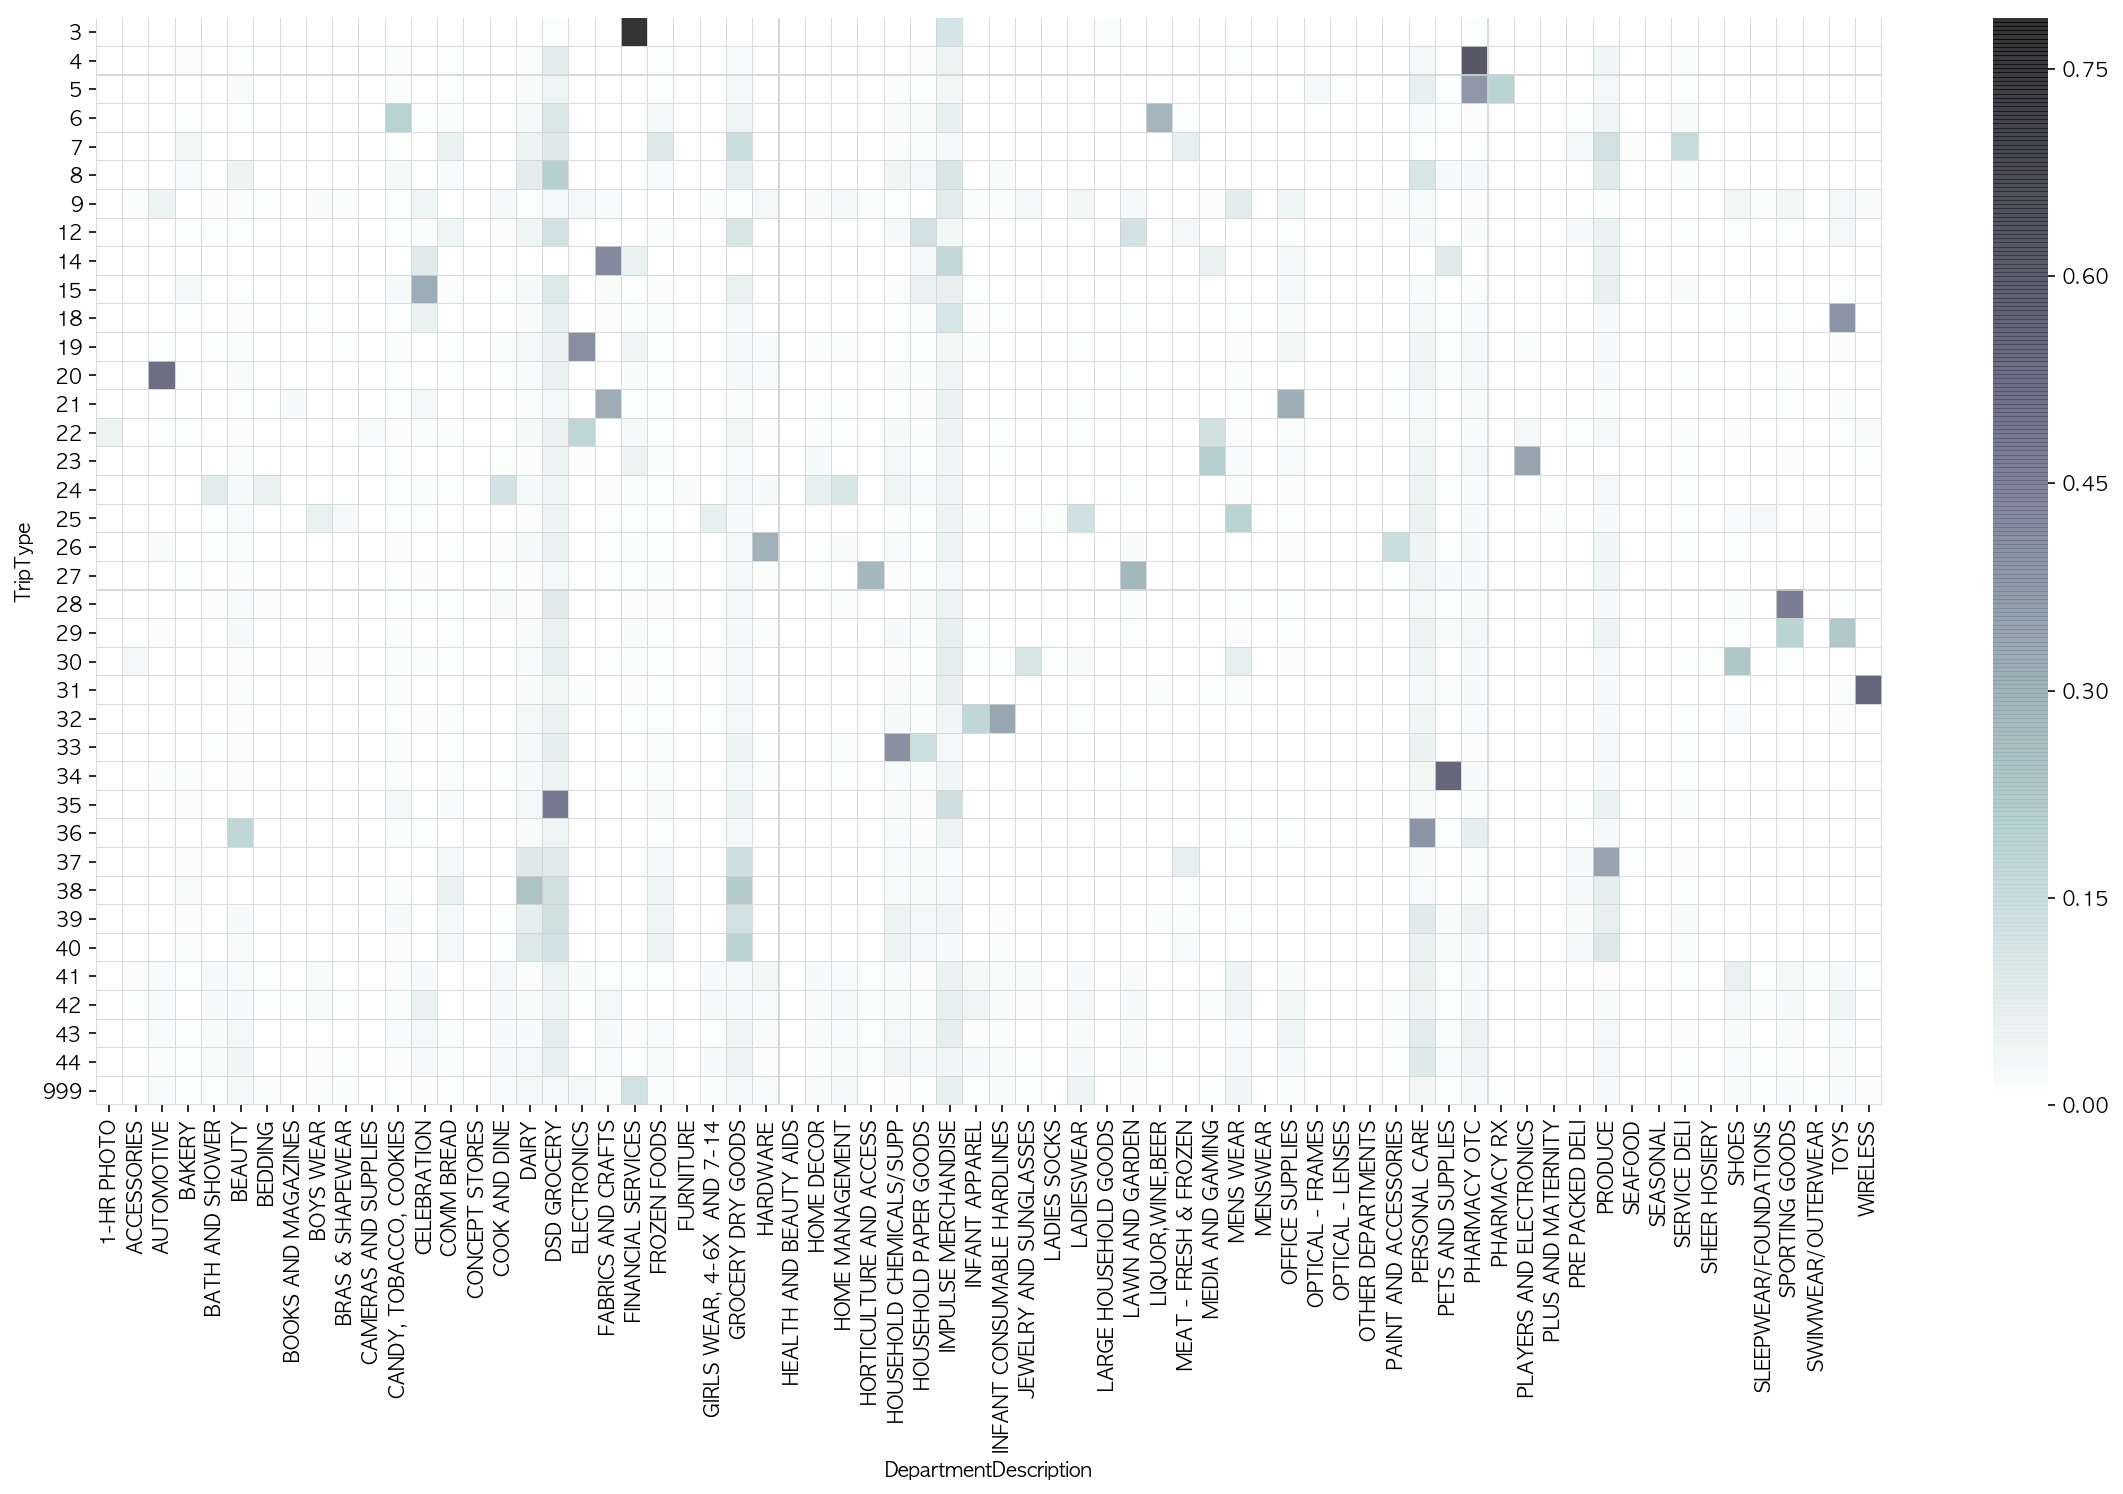

In [135]:
plt.figure(figsize=(20, 10))
sns.heatmap(trip_desc, linecolor="lightgrey", linewidths=0.02, cmap=plt.cm.bone_r, alpha=.8)

In [104]:
train[train["ScanCount"] < 0].shape[0]

15458

In [122]:
# return 컬럼 생성
# nan은 0으로 처리
train.loc[train.ScanCount < 0, "Return"] = 1
train.loc[train.Return != 1, "Return"] = 0

In [110]:
train.drop("Upc", axis=1, inplace=True)

,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription,FinelineNumber,check,full_upc,company,return
647049,39,191346,6,1,PHARMACY OTC,1118,8,323900017788,323900,NaN
647050,39,191346,6,1,FROZEN FOODS,1752,3,078742053363,787420,NaN
647051,39,191346,6,1,PRODUCE,4170,3,000000040723,4072,NaN
647052,8,191347,6,1,DAIRY,1512,1,041900076641,419000,NaN
647053,8,191347,6,1,GROCERY DRY GOODS,3600,1,038000596551,380005,NaN


In [125]:
train.tail()

,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription,FinelineNumber,check,full_upc,company,Return
647049,39,191346,6,1,PHARMACY OTC,1118,8,323900017788,323900,0.0
647050,39,191346,6,1,FROZEN FOODS,1752,3,078742053363,787420,0.0
647051,39,191346,6,1,PRODUCE,4170,3,000000040723,4072,0.0
647052,8,191347,6,1,DAIRY,1512,1,041900076641,419000,0.0
647053,8,191347,6,1,GROCERY DRY GOODS,3600,1,038000596551,380005,0.0
